# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [2]:
data = pd.read_csv("used_device_data.csv")

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset


In [4]:
data.shape

(3454, 15)

* The dataset contain 15 colums and 3454 rows

### Checking the data types of the columns for the dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized_used_price, which is of *float* type

### Statistical summary of the dataset

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


### Checking for duplicate values

In [7]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [9]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### `normalized_used_price`

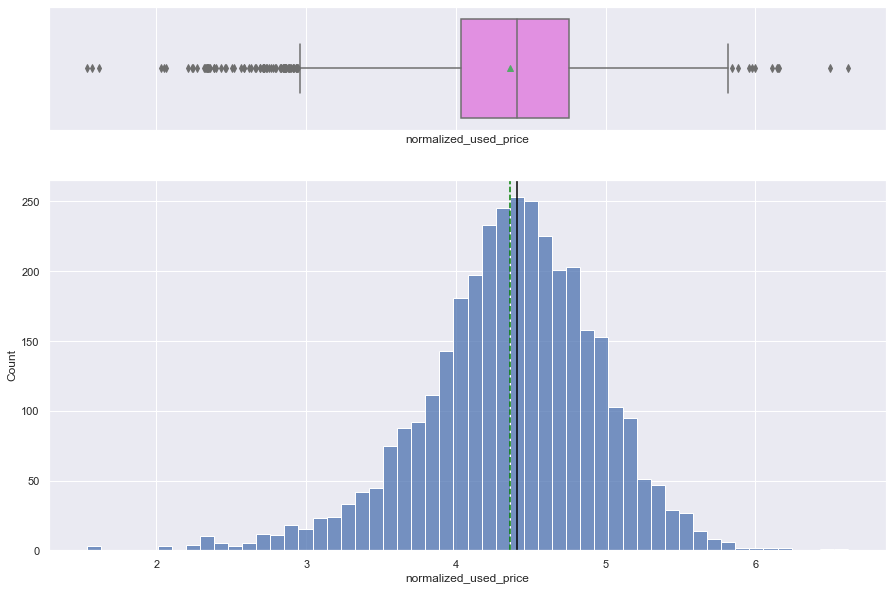

In [12]:
histogram_boxplot(df, "normalized_used_price")

* The normalized_used_price are close to normally distributed 
* The mean and the median are quite close to each other with the value around 4.3 euros 

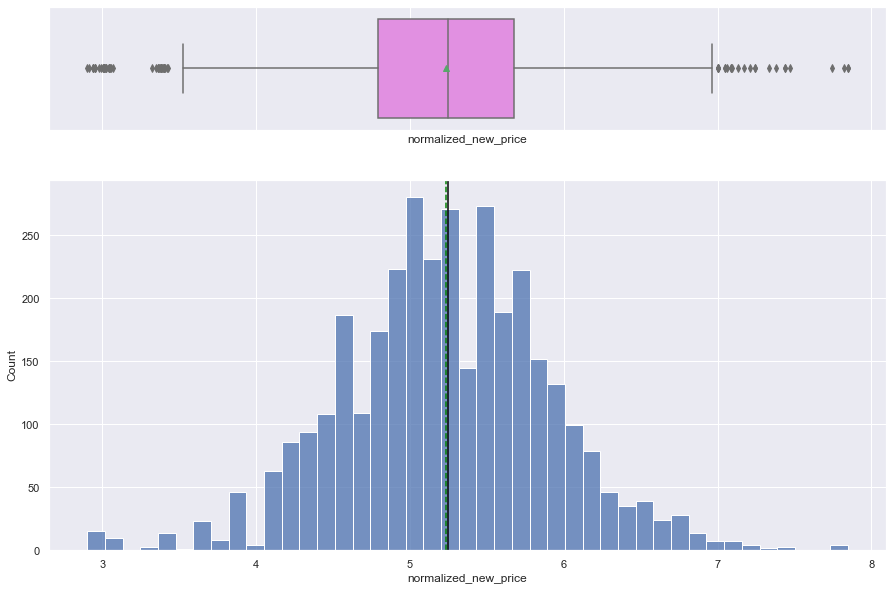

In [13]:
histogram_boxplot(df, "normalized_new_price")


* The normalized_new_price are close to normally distributed 
* The mean and the median are quite close to each other with the value around 5.2 euros 

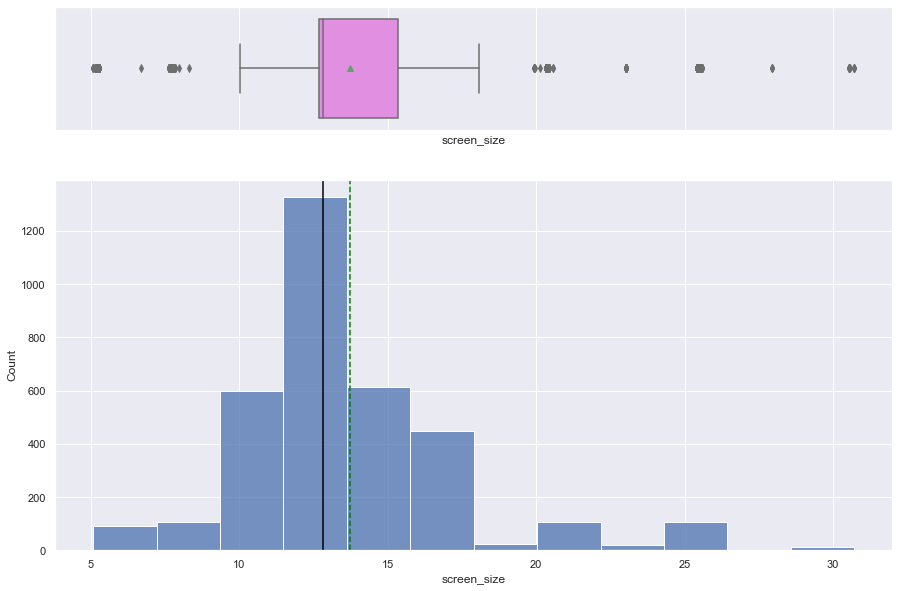

In [14]:
histogram_boxplot(df, "screen_size", bins = 12)

* The distribution for screen size right-skewed
* There is a spike at ~13 in the histogram, indicating that the popular screen size is around 13 inches

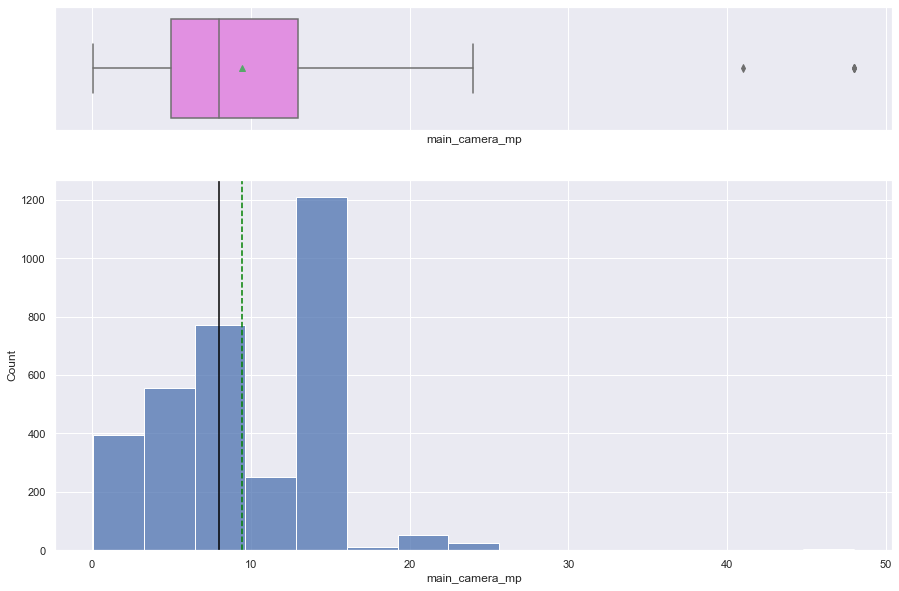

In [15]:
histogram_boxplot(df, "main_camera_mp", bins = 15)

* The distribution for mp for main camera is left-skewed
* There is a spike at ~14 in the histogram, indicating that the popular mp of main camera is around 14 mp

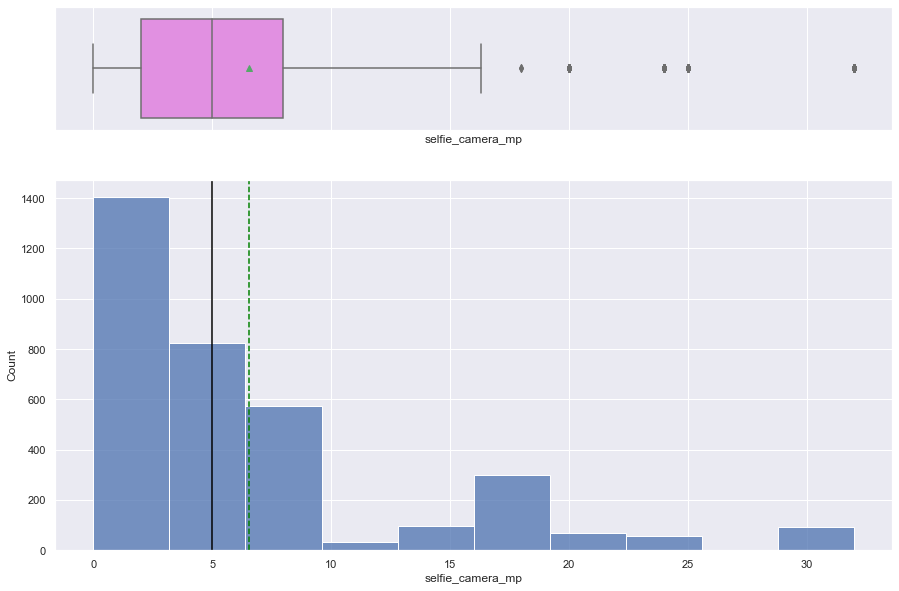

In [16]:
histogram_boxplot(df, "selfie_camera_mp", bins = 10)

* The distribution for mp for main camera is right-skewed
* The sefie camera tends to have low mp with the mode value is 0-1 mp

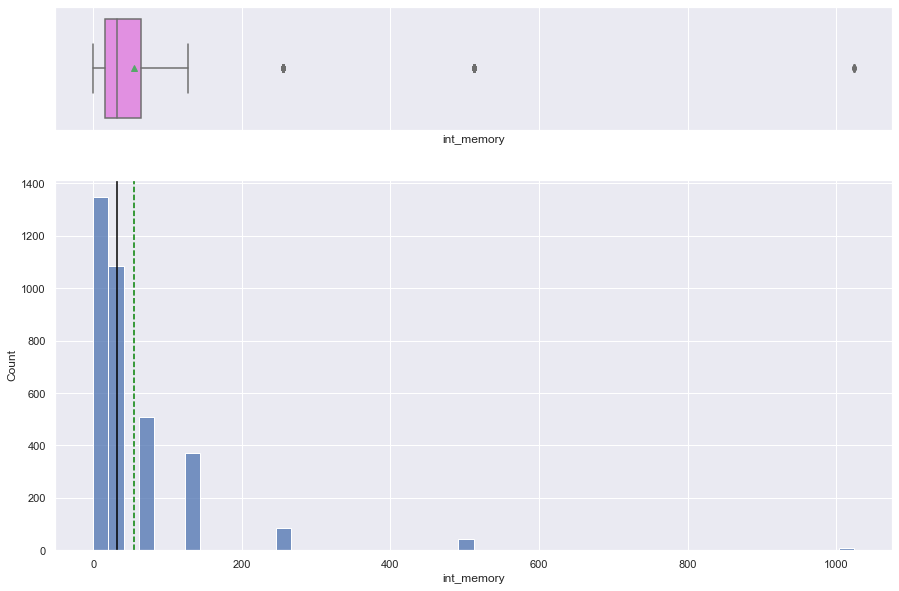

In [17]:
histogram_boxplot(df, "int_memory", bins = 50)

* The distribution of int memory  is heavily right-skewed with the most observed devices have less than 50GB


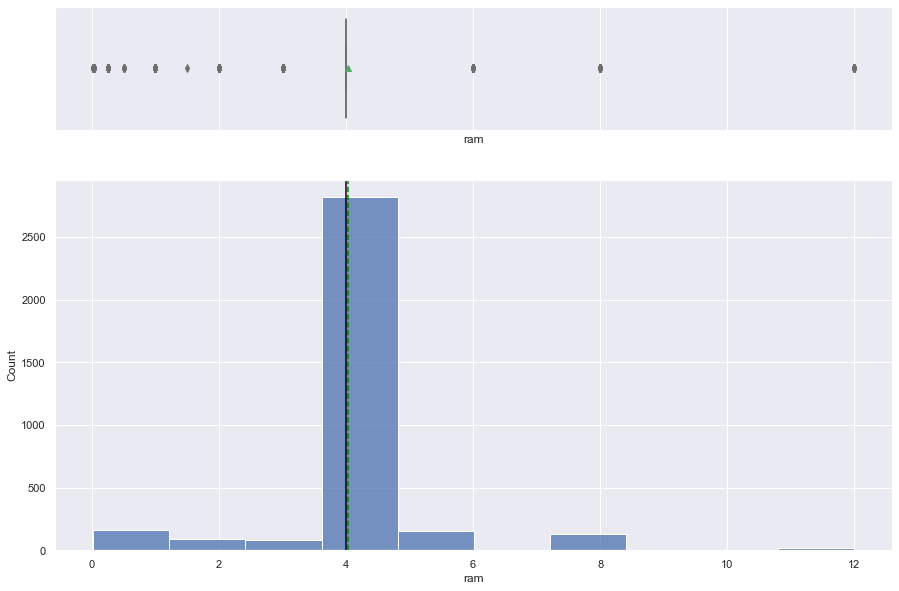

In [18]:
histogram_boxplot(df, "ram", bins = 10)

* 4GB is the most popular value for RAM

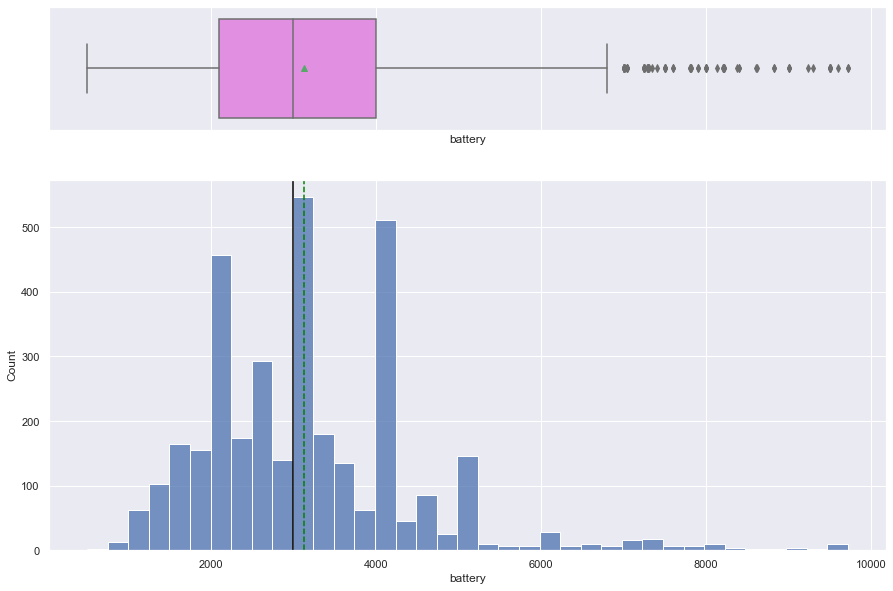

In [19]:
histogram_boxplot(df, "battery")

* The battery is right-skewed with the spike of 2000,3000 and 4000 mAh

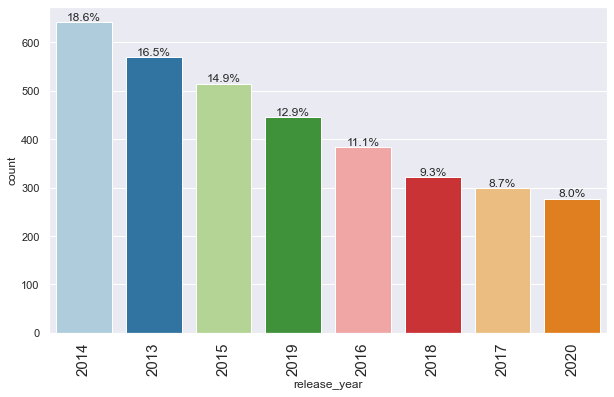

In [20]:
 labeled_barplot(df, "release_year", perc=True)


* Around 20% of used devices were manufactured in 2014

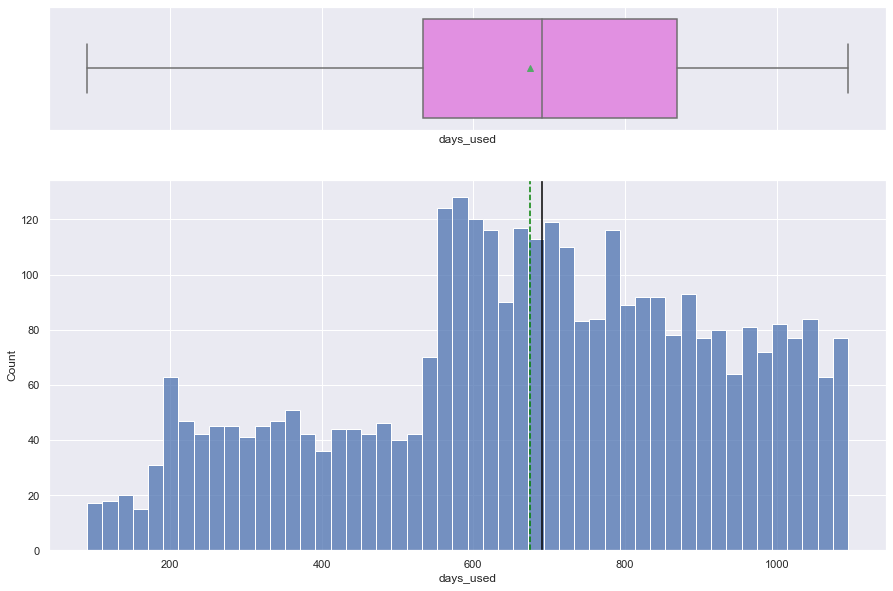

In [21]:
histogram_boxplot(df, "days_used", bins = 50)

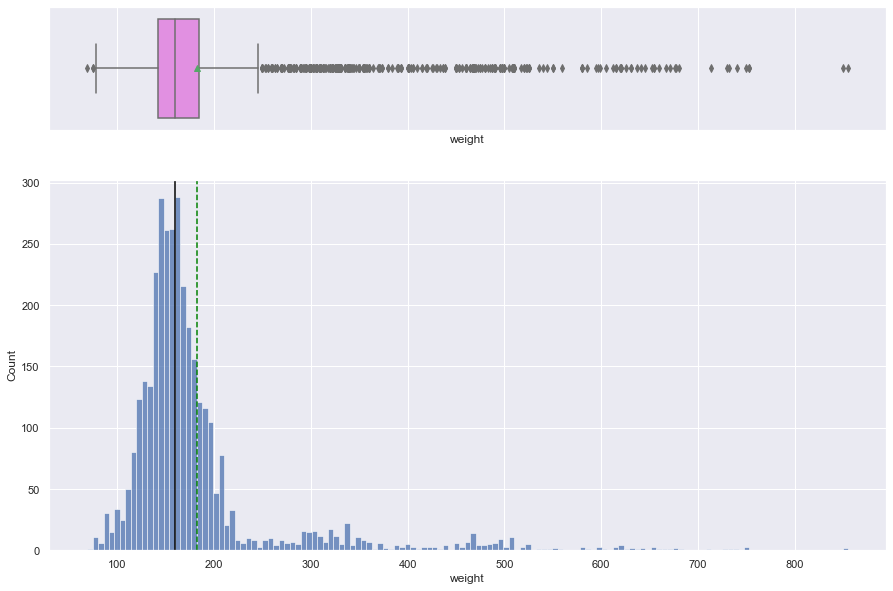

In [22]:
histogram_boxplot(df, "weight")

* The weight skews toward the right with the mode, mean and median are also the same value


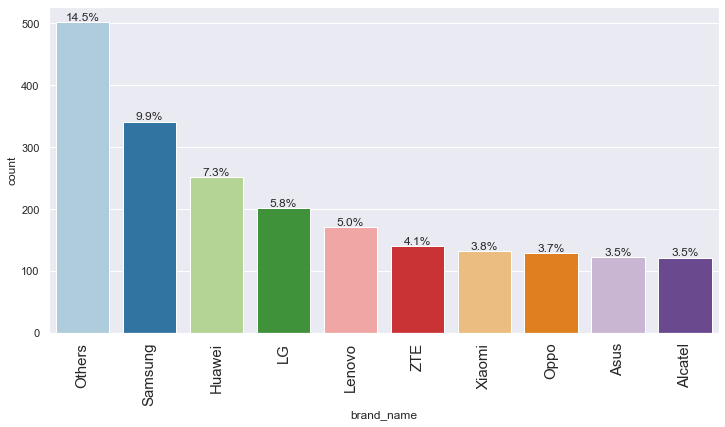

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=10)

* Samsung is the most popular brand of used devices (around 10%)

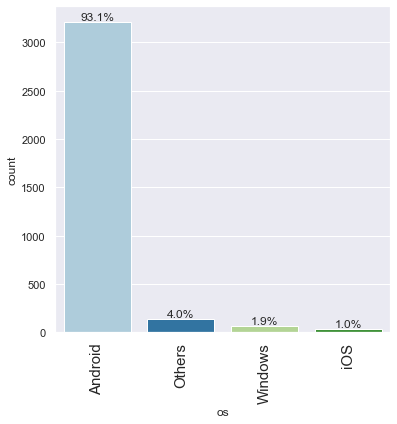

In [24]:
labeled_barplot(df, "os", perc=True)

* 93% of used phones have Android operation system

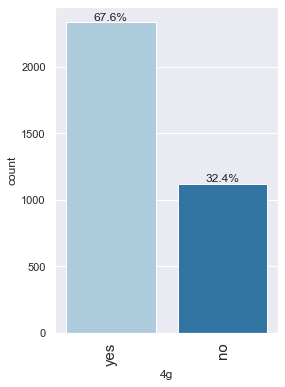

In [25]:
 labeled_barplot(df, "4g", perc=True)

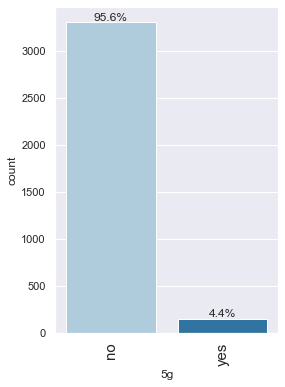

In [26]:
 labeled_barplot(df, "5g", perc=True)

### Bivariate analysis

#### Correlation Check

In [27]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()


# dropping release_yearrelease_year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")


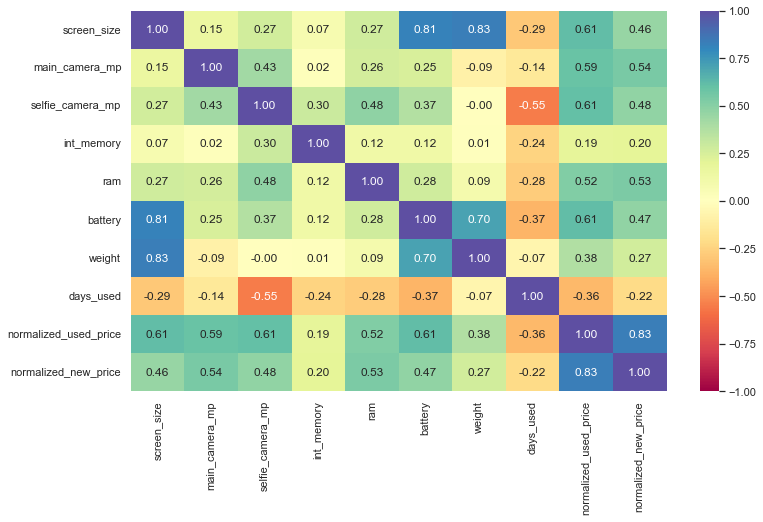

In [28]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The price of used device is highly correlated with the price of new device.
* The screen size is highly correlated with battery and weight
* The battery is very highly correlated with the weight of the device


#### Let's check the variation normalized_used_price with some of the categorical columns in the data.

#### `normalized_used_price` vs `brand_name`

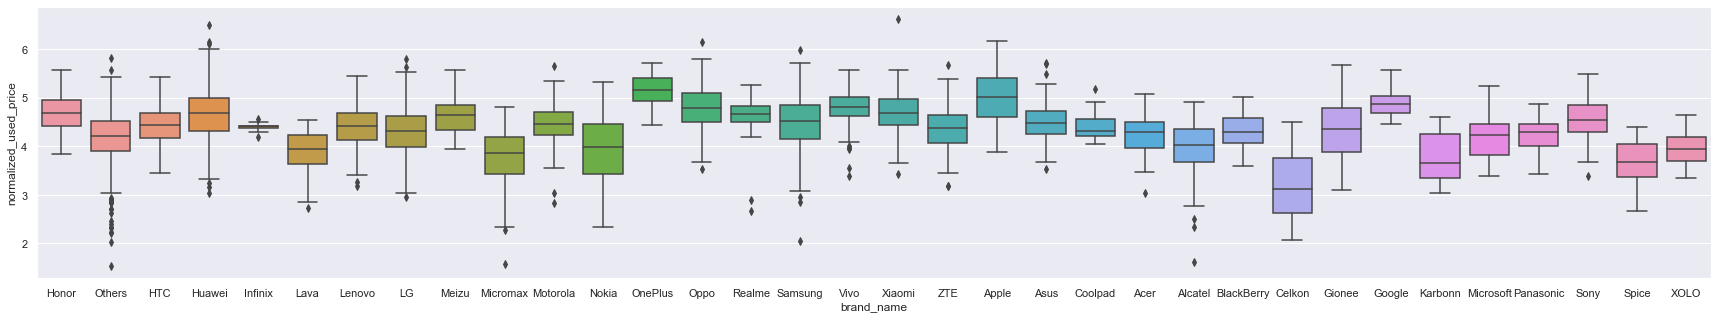

In [29]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=df, x="brand_name", y="normalized_used_price")
plt.show()

* Apple phones have highest resell price while cheapest phone in the market is Celkon

#### `normalized_used_price` vs `os`

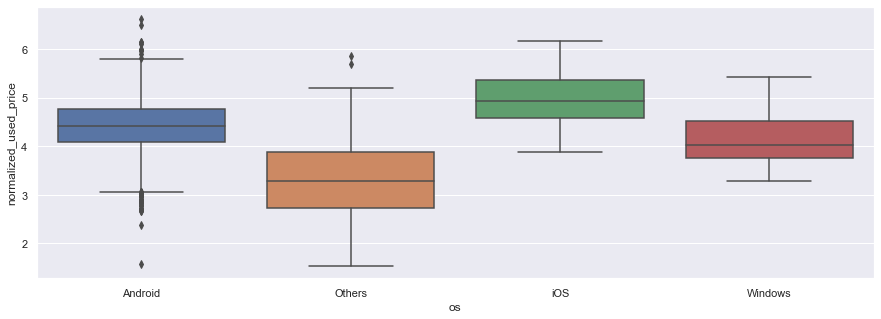

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="normalized_used_price")
plt.show()

* The iOS has the highest value on the market for second-hand device

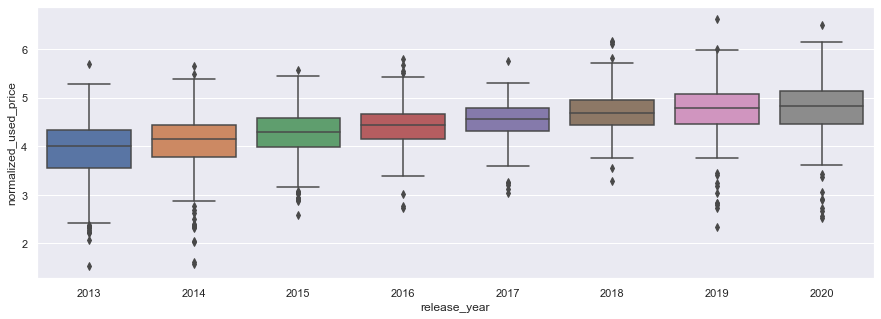

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="release_year", y="normalized_used_price")
plt.show()

* The used price has strong possitive relationship with release year

#### `normalized_new_price` vs `os`

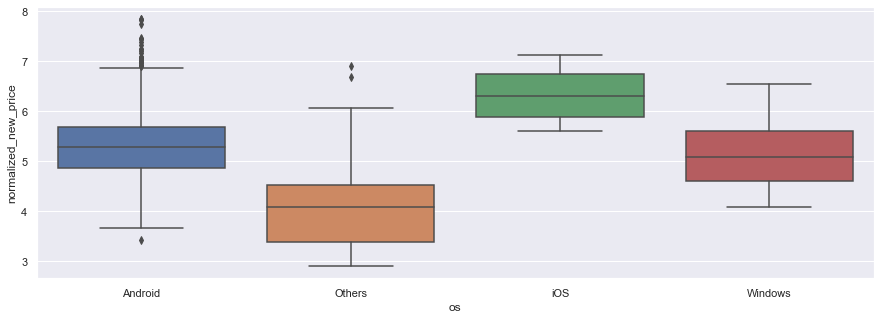

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="normalized_new_price")
plt.show()

* Similar to used - price, the phone with iOS is the most expensive for new phone market


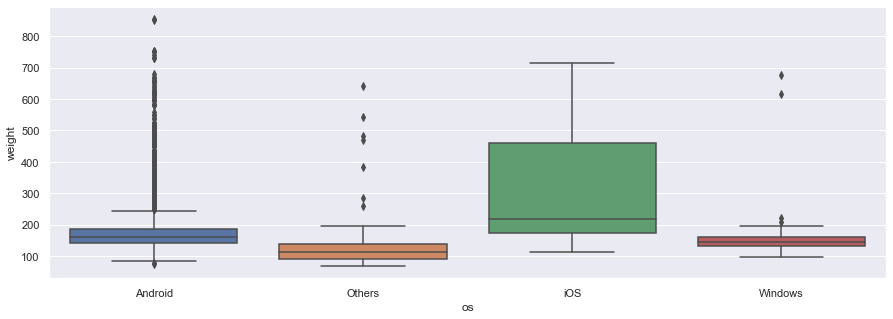

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="weight")
plt.show()

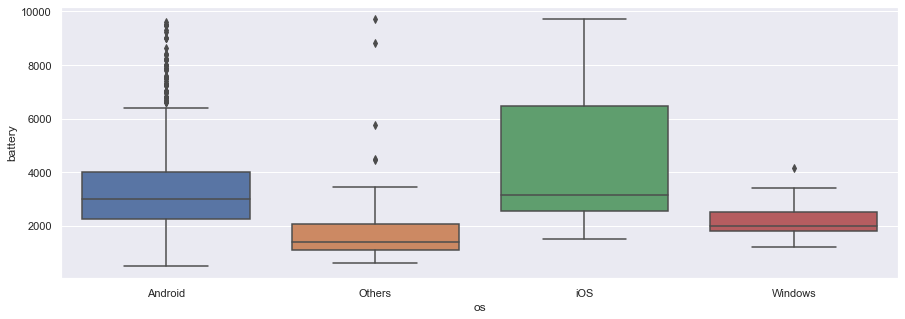

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="battery")
plt.show()

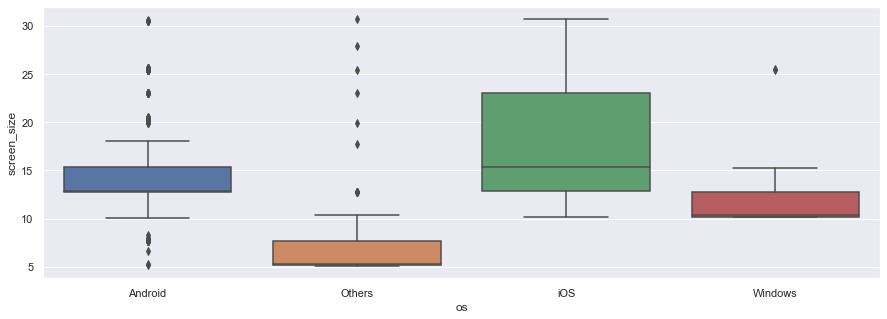

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="screen_size")
plt.show()

* It seems that the weight, battery and screen size of iOS phone are always hightest in the market in comparision with other OS

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [36]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

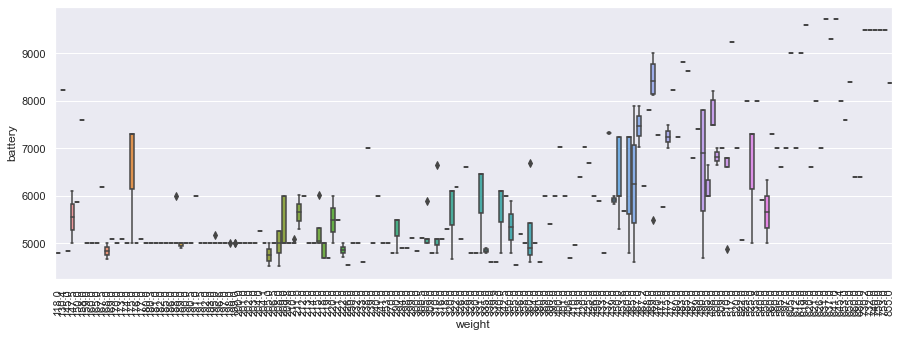

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df_large_battery,x= "weight",y= 'battery')
plt.xticks(rotation=90)
plt.show()

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [38]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<Figure size 2880x360 with 0 Axes>

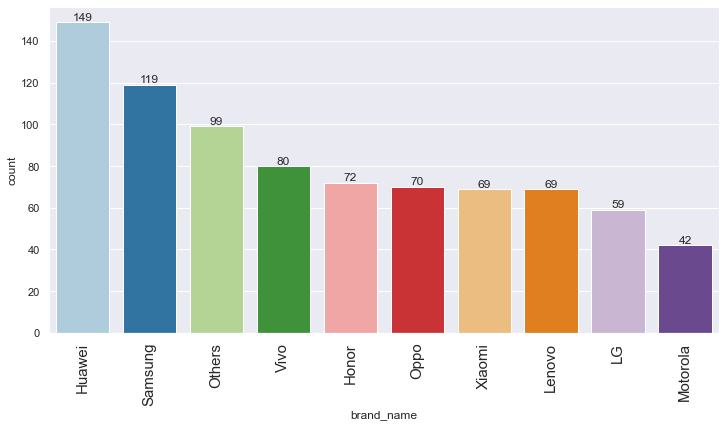

In [83]:
plt.figure(figsize=(40, 5))
labeled_barplot(df_large_screen,"brand_name",n = 10)
plt.show()

* There is around 1099 devices have screen size larger than 6 inches, the popular brand is Huawei and Samsung

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [40]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

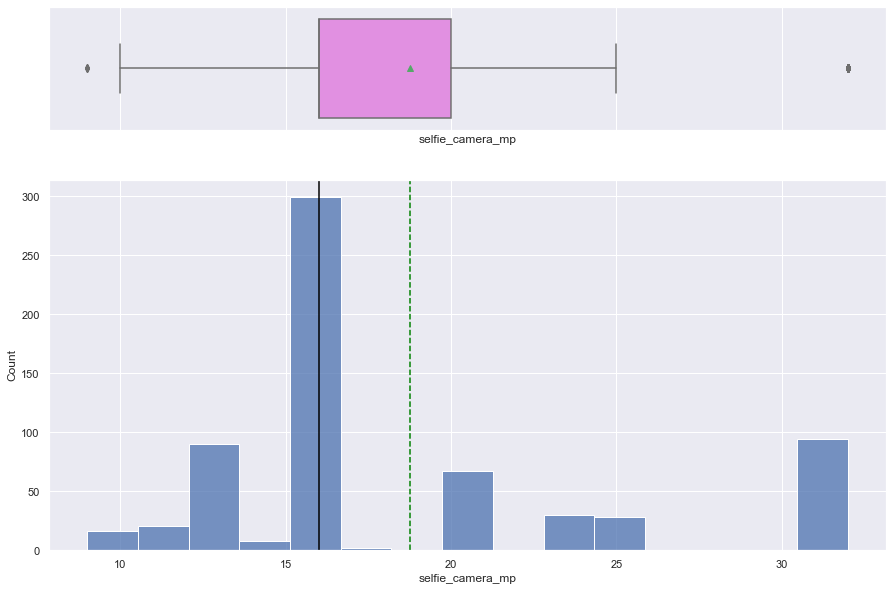

In [41]:
histogram_boxplot(df_selfie_camera, "selfie_camera_mp", bins = 15)

* The distribution of sefie camara with more than 8mp is slightly right-skewed

## Data Preprocessing

### Missing Value Treatment

In [42]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Let's fix the missing values in the data.
- For the variables `main_camera_mp`,`battery`,`weight` we will impute the missing values in each column with the median grouped by `brand_name` as the columns have skewed distributions

In [43]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

In [44]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)

df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["brand_name"])["battery"].transform("median")
)

df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["weight"].transform("median")
)

df1["int_memory"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["int_memory"].transform("median")
)


df1["ram"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["ram"].transform("median")
)


df1["battery "] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["battery"].transform("median")
)



df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
battery                   0
dtype: int64

* We will impute the remaining missing values in the `main_camera_mp` column with the median grouped by `os`

In [45]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["os"])["main_camera_mp"].transform("median")
)

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
battery                  0
dtype: int64

- All the missing values have been treated.

### Feature Engineering

* Let's create a new feature `years_from_2021` by taking the difference between the year that data was collected and the release_year.
* We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [46]:
df1["years_from_2021"] = 2021 - df1["release_year"]
df1.drop(["release_year"], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,battery,years_from_2021
0,Honor,Android,14.50,yes,no,13.0,5.0,146.0,146.0,3020.0,146.0,127,4.307572,4.715100,146.0,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,213.0,213.0,4300.0,213.0,325,5.162097,5.519018,213.0,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,213.0,213.0,4200.0,213.0,162,5.111084,5.884631,213.0,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,480.0,480.0,7250.0,480.0,345,5.135387,5.630961,480.0,1
4,Honor,Android,15.32,yes,no,13.0,8.0,185.0,185.0,5000.0,185.0,293,4.389995,4.947837,185.0,1


### Outlier Detection

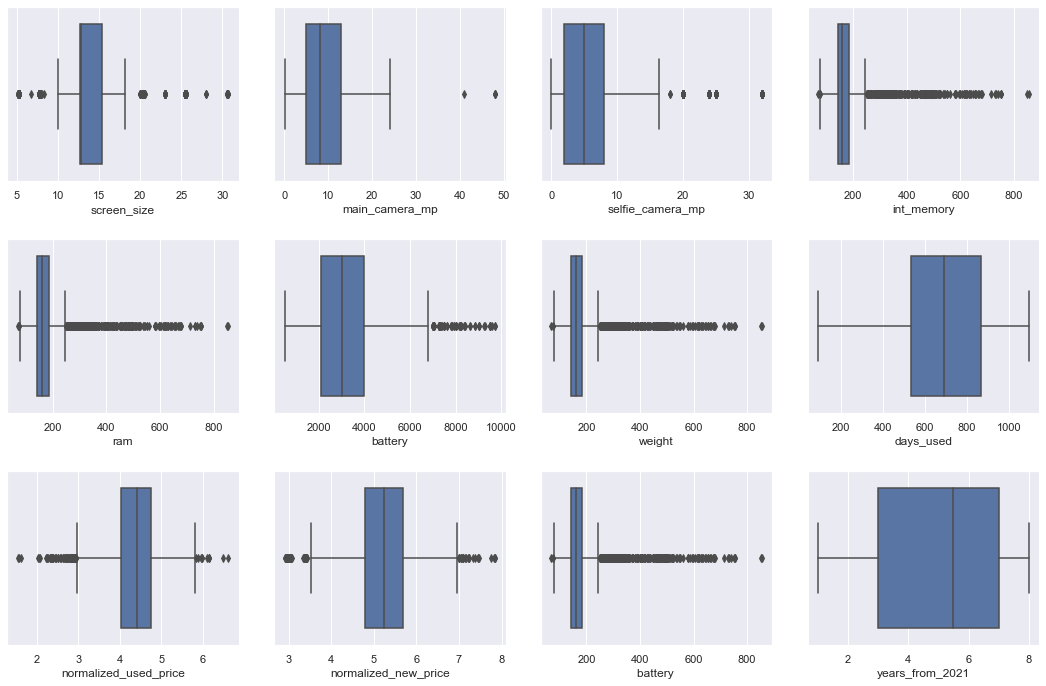

In [47]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [48]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory    ram  battery  weight  days_used  \
0               5.0       146.0  146.0   3020.0   146.0        127   
1              16.0       213.0  213.0   4300.0   213.0        325   
2               8.0       213.0  213.0   4200.0   213.0        162   
3               8.0       480.0  480.0   7250.0   480.0        345   
4               8.0       185.0  185.0   5000.0   185.0        293   

   normalized_new_price  battery   years_from_2021  
0              4.715100     146.0                1  
1              5.519018     213.0                1  
2              5.884631     213.0  

In [49]:
# let's add the intercept to data
X = sm.add_constant(X)

/Users/thanhho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,146.0,146.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,213.0,213.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,213.0,213.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,480.0,480.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,185.0,185.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [53]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     277.7
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:08:11   Log-Likelihood:                 113.06
No. Observations:                   2417   AIC:                            -132.1
Df Residuals:                       2370   BIC:                             140.0
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [54]:
### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.84**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.339**

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [55]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230913,0.181498,0.843494,0.840187,4.355106


In [57]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238909,0.1848,0.84175,0.833725,4.505604


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict price of used device within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the used device price

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [59]:
checking_vif(x_train)

/Users/thanhho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,224.923071
1,screen_size,7.665353
2,main_camera_mp,2.246829
3,selfie_camera_mp,2.656663
4,int_memory,inf
5,ram,inf
6,battery,4.081473
7,weight,inf
8,days_used,2.656300
9,normalized_new_price,2.794268


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.


In [60]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [61]:
col_list = ["int_memory", "ram","weight", "battery","screen_size"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,int_memory,0.840456,0.233191
1,ram,0.840456,0.233191
2,weight,0.840456,0.233191
3,battery,0.840176,0.233396
4,screen_size,0.837143,0.235600


In [62]:
col_to_drop = "int_memory"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/Users/thanhho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  int_memory


,feature,VIF
0,const,224.923071
1,screen_size,7.665353
2,main_camera_mp,2.246829
3,selfie_camera_mp,2.656663
4,ram,inf
5,battery,4.081473
6,weight,inf
7,days_used,2.656300
8,normalized_new_price,2.794268
9,battery,inf


In [63]:
col_to_drop = "int_memory", "ram"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/Users/thanhho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  ('int_memory', 'ram')


,feature,VIF
0,const,224.923071
1,screen_size,7.665353
2,main_camera_mp,2.246829
3,selfie_camera_mp,2.656663
4,battery,4.081473
5,weight,inf
6,days_used,2.656300
7,normalized_new_price,2.794268
8,battery,inf
9,years_from_2021,4.833549


In [64]:
col_to_drop = "int_memory", "ram","weight"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('int_memory', 'ram', 'weight')


,feature,VIF
0,const,224.923071
1,screen_size,7.665353
2,main_camera_mp,2.246829
3,selfie_camera_mp,2.656663
4,battery,4.081473
5,days_used,2.656300
6,normalized_new_price,2.794268
7,battery,6.390945
8,years_from_2021,4.833549
9,brand_name_Alcatel,3.401843


In [65]:
col_to_drop = "int_memory", "ram","weight", "battery"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('int_memory', 'ram', 'weight', 'battery')


,feature,VIF
0,const,204.008182
1,screen_size,1.689736
2,main_camera_mp,2.149395
3,selfie_camera_mp,2.628145
4,days_used,2.643925
5,normalized_new_price,2.772059
6,years_from_2021,4.591236
7,brand_name_Alcatel,3.396231
8,brand_name_Apple,12.997668
9,brand_name_Asus,3.325824


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [66]:
olsmod1 = sm.OLS(y_train, x_train5).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     282.9
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:08:13   Log-Likelihood:                 86.073
No. Observations:                   2417   AIC:                            -82.15
Df Residuals:                       2372   BIC:                             178.4
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.840 to 0.837, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [67]:
# initial list of columns
predictors = x_train5.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'normalized_new_price', 'years_from_2021', 'brand_name_Lenovo', 'brand_name_Xiaomi', '4g_yes']


In [68]:
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

In [69]:
olsmod2 = sm.OLS(y_train, x_train6).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:08:13   Log-Likelihood:                 70.908
No. Observations:                   2417   AIC:                            -123.8
Df Residuals:                       2408   BIC:                            -71.70
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train6, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234975,0.184466,0.837939,0.837333,4.430849


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test6, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239873,0.186529,0.84047,0.839072,4.551248


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.84, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.84
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

In [72]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.853184,0.234304
1525,4.448399,4.620806,-0.172407
1128,4.315353,4.278931,0.036422
3003,4.282068,4.249374,0.032694
2907,4.456438,4.447939,0.008499


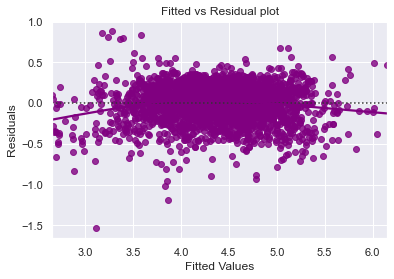

In [73]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

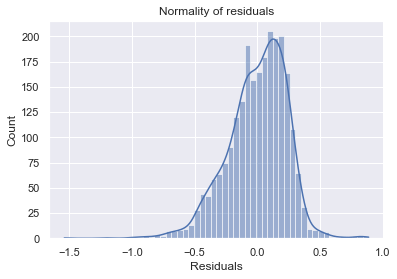

In [74]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

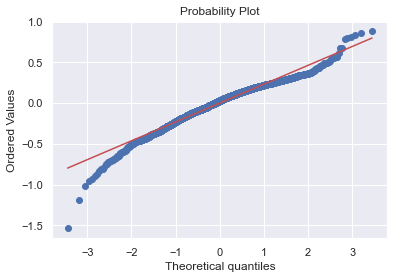

In [75]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.
Let's check the results of the Shapiro-Wilk test.

In [76]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9705116152763367, pvalue=6.834363726440233e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**


### TEST FOR HOMOSCEDASTICITY

In [77]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0448835554466096), ('p-value', 0.22718261802390216)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data


Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [78]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.357334
2341,3.696103,3.940071
1913,3.592093,3.757416
688,4.306495,4.110450
650,4.522115,5.142976
2291,4.259294,4.388648
40,4.997685,5.390595
1884,3.875359,4.088672
2538,4.206631,4.055255
45,5.380450,5.290516


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [79]:
x_train_final = x_train6.copy()
x_test_final = x_test6.copy()

In [80]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:08:15   Log-Likelihood:                 70.908
No. Observations:                   2417   AIC:                            -123.8
Df Residuals:                       2408   BIC:                            -71.70
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [81]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234975,0.184466,0.837939,0.837333,4.430849


In [82]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239873,0.186529,0.84047,0.839072,4.551248


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the price of used device

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

1. The model is able to explain ~84% of the variation in the data and within 4.5% of the normalized_used_price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the screen size increases by one unit, then its normalized_used_price increases by 0.0426  units, all other variables held constant


3. If the main_camera_mp increases by one unit, then its normalized_used_price increases by 0.0186 units, all other variables held constant


4. If the selfie_camera_mp increases by one unit, then its normalized_used_price increases by 0.0138  units, all other variables held constant


5. If the normalized_new_price by one unit, then its normalized_used_price increases by 0.4427  units, all other variables held constant


6. If the phone released longer by one unit, then its normalized_used_price decreases then its normalized_used_price increases by 0.4427  units, all other variables held constant  units, all other variables held constant


6. As the used price increases with an increase of the screen size, main camera mp, sefies camera mp, the company should carefully choose suitable phone to make more profit. Moreover, the used phone price depened strongly on the price of the new phone within same model, thus, choosing more phone which has high price on new market will increase the price of that model in the second hand market


___